In [101]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [102]:
df=pd.read_csv("imdb_top_1000.csv")

In [103]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [105]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [106]:
df = df[df["Certificate"].notnull()]

In [107]:
df = df[df["Meta_score"].notnull()]

In [108]:
df = df[df["Gross"].notnull()]

In [109]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [110]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [111]:
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower) & (df[feature] <= upper)]
    return df

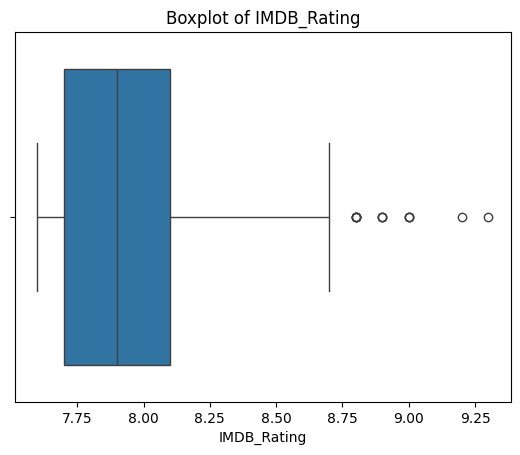

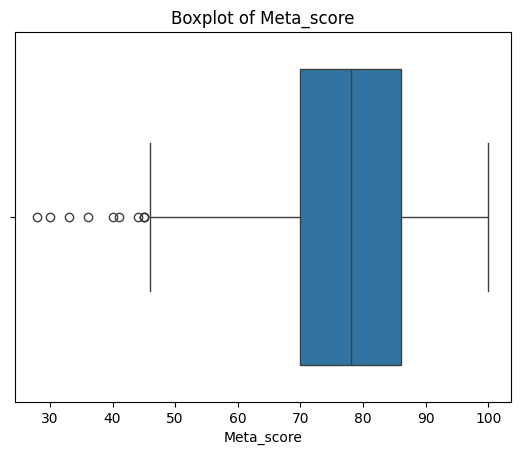

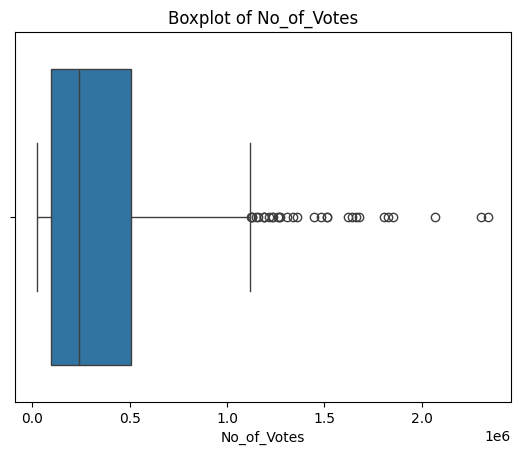

In [112]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_features:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [113]:
df = remove_outliers(df, numeric_features)
print(f"Data shape after removing outliers: {df.shape}")

Data shape after removing outliers: (674, 16)


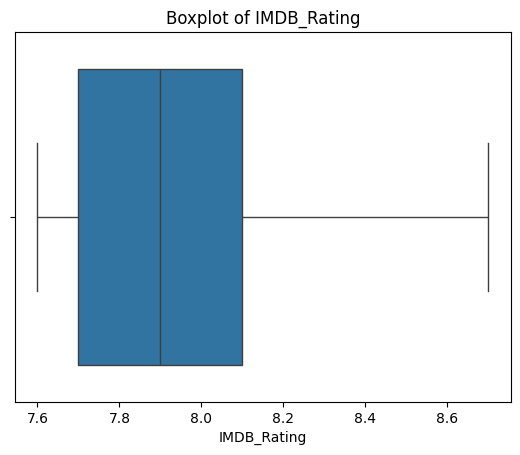

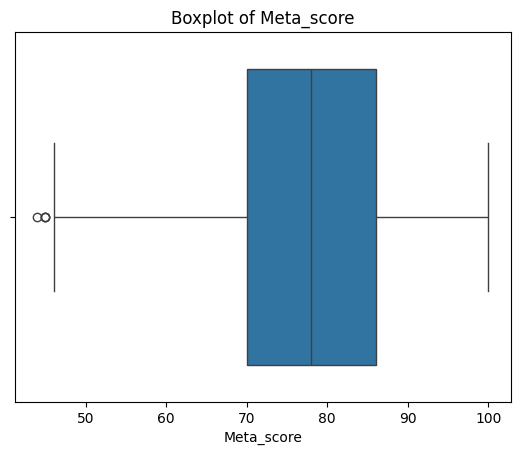

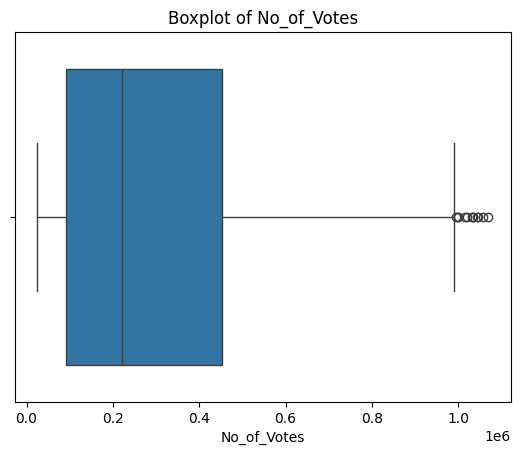

In [114]:
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_features:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 674 entries, 15 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    674 non-null    object 
 1   Series_Title   674 non-null    object 
 2   Released_Year  674 non-null    object 
 3   Certificate    674 non-null    object 
 4   Runtime        674 non-null    object 
 5   Genre          674 non-null    object 
 6   IMDB_Rating    674 non-null    float64
 7   Overview       674 non-null    object 
 8   Meta_score     674 non-null    float64
 9   Director       674 non-null    object 
 10  Star1          674 non-null    object 
 11  Star2          674 non-null    object 
 12  Star3          674 non-null    object 
 13  Star4          674 non-null    object 
 14  No_of_Votes    674 non-null    int64  
 15  Gross          674 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 89.5+ KB


In [116]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

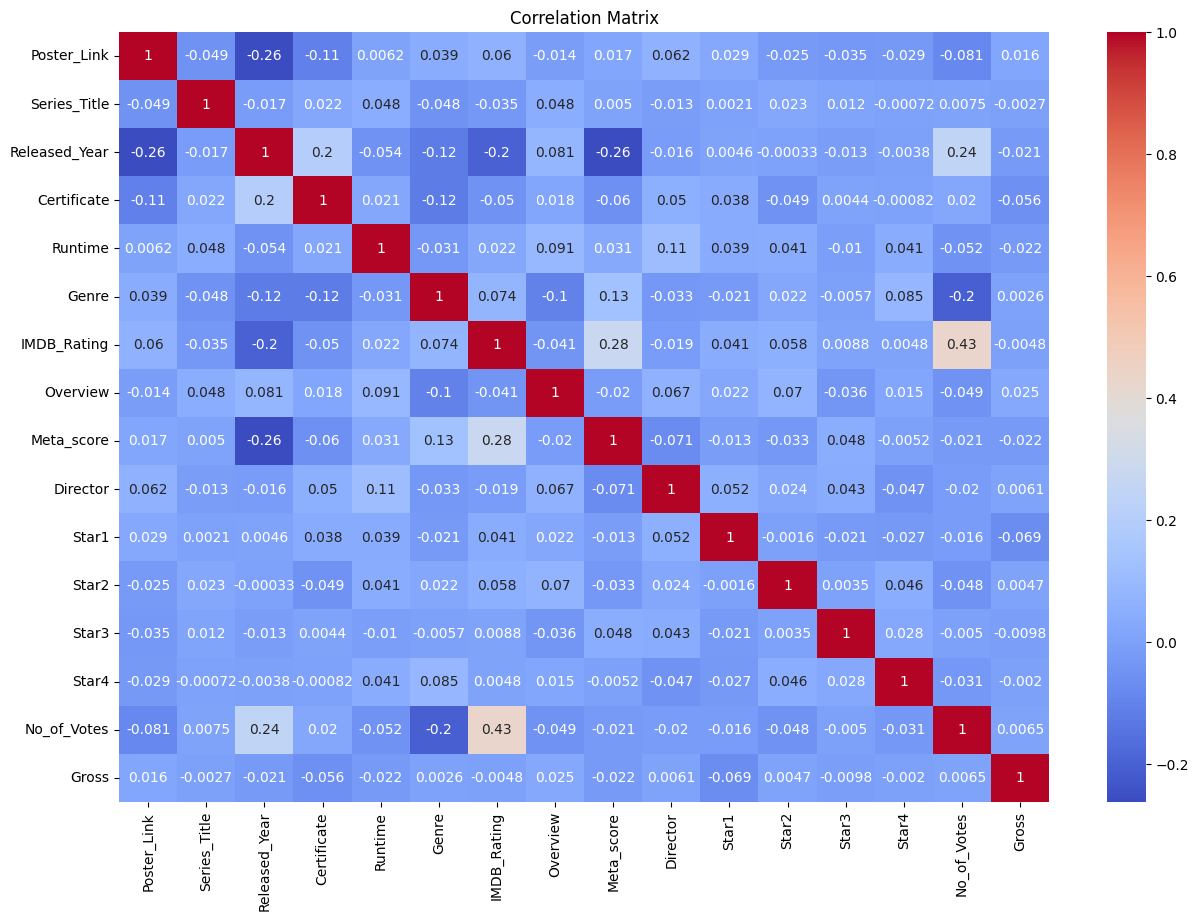

In [117]:
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [118]:
# Let's pick a target. For illustration, assume 'IMDB_Rating' > 8 is "1" else "0"
df['target'] = df['IMDB_Rating'].apply(lambda x: 1 if x >= 8 else 0)

In [119]:
# Drop original 'IMDB_Rating' to avoid leakage
X = df.drop(['IMDB_Rating', 'target'], axis=1)
y = df['target']

In [120]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [121]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("-"*60)


Random Forest Accuracy: 0.7407
              precision    recall  f1-score   support

           0       0.67      0.97      0.79        69
           1       0.94      0.50      0.65        66

    accuracy                           0.74       135
   macro avg       0.81      0.74      0.72       135
weighted avg       0.80      0.74      0.72       135

[[67  2]
 [33 33]]
------------------------------------------------------------
Logistic Regression Accuracy: 0.7407
              precision    recall  f1-score   support

           0       0.68      0.91      0.78        69
           1       0.86      0.56      0.68        66

    accuracy                           0.74       135
   macro avg       0.77      0.74      0.73       135
weighted avg       0.77      0.74      0.73       135

[[63  6]
 [29 37]]
------------------------------------------------------------
KNN Accuracy: 0.6444
              precision    recall  f1-score   support

           0       0.60      0.88      0.7

In [123]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))


KNN Accuracy: 0.6444444444444445
              precision    recall  f1-score   support

           0       0.60      0.88      0.72        69
           1       0.76      0.39      0.52        66

    accuracy                           0.64       135
   macro avg       0.68      0.64      0.62       135
weighted avg       0.68      0.64      0.62       135

[[61  8]
 [40 26]]
Decision Tree Accuracy: 0.7111111111111111
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        69
           1       0.74      0.64      0.68        66

    accuracy                           0.71       135
   macro avg       0.71      0.71      0.71       135
weighted avg       0.71      0.71      0.71       135

[[54 15]
 [24 42]]
Naive Bayes Accuracy: 0.762962962962963
              precision    recall  f1-score   support

           0       0.69      0.96      0.80        69
           1       0.93      0.56      0.70        66

    accuracy                